# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = None  # TODO

temps_df

In [6]:
file_path = "/Users/akiamy/archivos/finalp/eae_ipld_project-main/data/cities_temperatures.csv"

df_temp = pd.read_csv(file_path)

df_temp.head()


,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [17]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it

temps_df["Date"] = pd.to_datetime(temps_df["Date"])
print(temps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72732 entries, 0 to 72731
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Country                   72732 non-null  object        
 1   City                      72732 non-null  object        
 2   AvgTemperatureFahrenheit  72732 non-null  float64       
 3   Date                      72732 non-null  datetime64[ns]
 4   Month                     72732 non-null  int64         
 5   Year                      72732 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB
None


In [8]:
if "Date" in df_temp.columns:
    df_temp["Date"] = pd.to_datetime(df_temp["Date"], errors="coerce").dt.date
else:
    print("Column 'Date' not found! Check the column names:", df_temp.columns)

print(df_temp.dtypes)

Country                      object
City                         object
AvgTemperatureFahrenheit    float64
Date                         object
Month                         int64
Year                          int64
dtype: object


In [ ]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

# temps_df["AvgTemperatureCelsius"] = ...  # TODO: uncomment this line to complete it

temps_df

In [ ]:

if "AvgTemperature" in df_temp.columns:
    df_temp["AvgTemperatureCelsius"] = (df_temp["AvgTemperature"] - 32) * 5 / 9
else:
    print("Column 'AvgTemperature' not found! Check the column names:", df_temp.columns)

df_temp.head()

Column 'AvgTemperature' not found! Check the column names: Index(['Country', 'City', 'AvgTemperatureFahrenheit', 'Date', 'Month', 'Year'], dtype='object')


,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [ ]:

if "City" in df_temp.columns:
    unique_cities_list = df_temp["City"].dropna().unique().tolist()  
    num_unique_cities = len(unique_cities_list) 

    print(f"There are {num_unique_cities} unique cities in the dataset.")
    print("List of unique cities:", unique_cities_list)
else:
    print("Column 'City' not found! Check the column names:", df_temp.columns)

There are 10 unique cities in the dataset.
List of unique cities: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [ ]:
import pandas as pd
pd.DataFrame(unique_cities_list, columns=["Unique Cities"])

,Unique Cities
0,Buenos Aires
1,Canberra
2,Bogota
3,Cairo
4,Munich
5,Calcutta
6,Tokyo
7,Dakar
8,Capetown
9,Washington


In [18]:
# Ex 3.4: What are the minimum and maximum dates?

if "Date" in df_temp.columns:
    df_temp["Date"] = pd.to_datetime(df_temp["Date"], errors="coerce")

    min_date = df_temp["Date"].min()
    max_date = df_temp["Date"].max()


    print(f"The dataset contains temperature records from {min_date.date()} to {max_date.date()}.")
else:
    print("Column 'Date' not found! Check the column names:", df_temp.columns)
# TODO: print a message with the min and max dates

The dataset contains temperature records from 2000-01-01 to 2019-12-31.


In [ ]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

temps_df["Date"] = pd.to_datetime(temps_df["Date"])

if "AvgTemperatureCelsius" not in temps_df.columns:
    temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9

min_temp = temps_df["AvgTemperatureCelsius"].min()
max_temp = temps_df["AvgTemperatureCelsius"].max()

min_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"] == min_temp]
max_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"] == max_temp]

min_temp_city = min_temp_row["City"].values[0]
min_temp_date = pd.Timestamp(min_temp_row["Date"].values[0]).strftime("%Y-%m-%d")

max_temp_city = max_temp_row["City"].values[0]
max_temp_date = pd.Timestamp(max_temp_row["Date"].values[0]).strftime("%Y-%m-%d")

print(f"The lowest recorded temperature was {min_temp:.2f}°C in {min_temp_city} on {min_temp_date}.")
print(f"The highest recorded temperature was {max_temp:.2f}°C in {max_temp_city} on {max_temp_date}.")

The lowest recorded temperature was -16.78°C in Munich on 2000-01-25.
The highest recorded temperature was 37.89°C in Cairo on 2019-05-23.


/var/folders/k8/3ssq2lqx2x7dnd_7z5cjh3vh0000gn/T/ipykernel_89260/3242051858.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


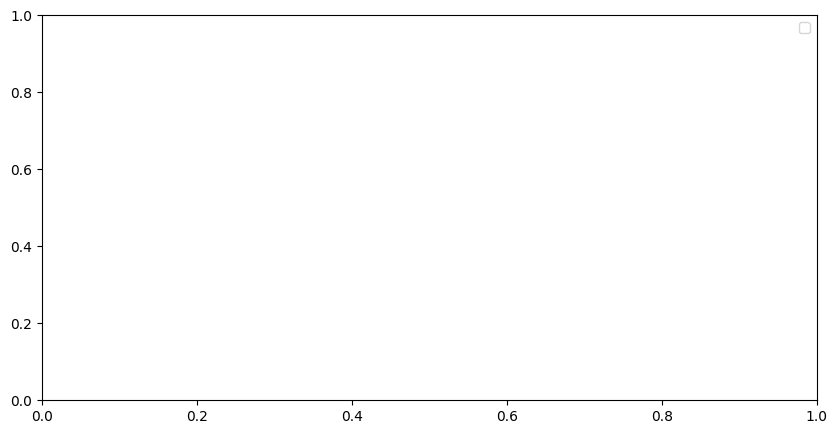

In [26]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = None          # TODO: get a dataframe with the rows of the selected city

city_df_period = None   # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# plt.plot()    # TODO
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO
plt.legend()

plt.show()


In [ ]:
df_temp["Date"] = pd.to_datetime(df_temp["Date"])

In [ ]:
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2010-12-31")

city_df = df_temp[df_temp["City"] == "Munich"]

city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

print(city_df_period.head())


       Country    City  AvgTemperatureFahrenheit       Date  Month  Year  \
31961  Germany  Munich                      26.7 2008-01-01      1  2008   
31962  Germany  Munich                      27.2 2008-01-02      1  2008   
31963  Germany  Munich                      27.2 2008-01-03      1  2008   
31964  Germany  Munich                      28.4 2008-01-04      1  2008   
31965  Germany  Munich                      28.5 2008-01-05      1  2008   

       AvgTemperatureCelsius  
31961              -2.944444  
31962              -2.666667  
31963              -2.666667  
31964              -2.000000  
31965              -1.944444  


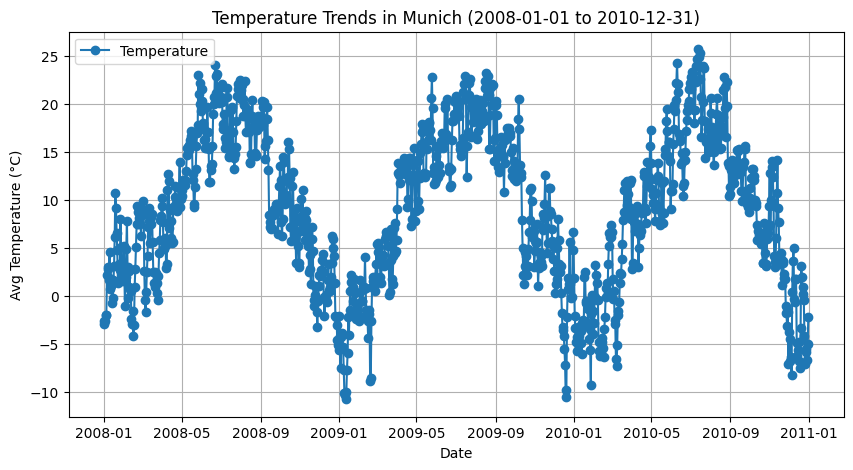

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], marker="o", linestyle="-", label="Temperature")
plt.title(f"Temperature Trends in Munich ({start_date.date()} to {end_date.date()})")
plt.xlabel("Date")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

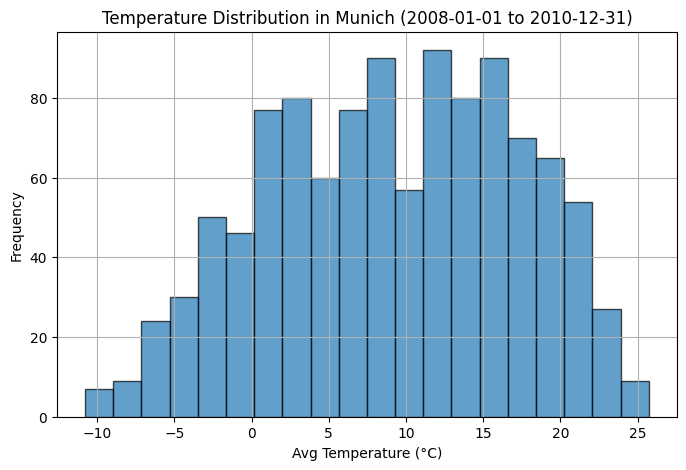

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.7, edgecolor="black")
plt.title(f"Temperature Distribution in Munich ({start_date.date()} to {end_date.date()})")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

# plt.hist()    # TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.show()

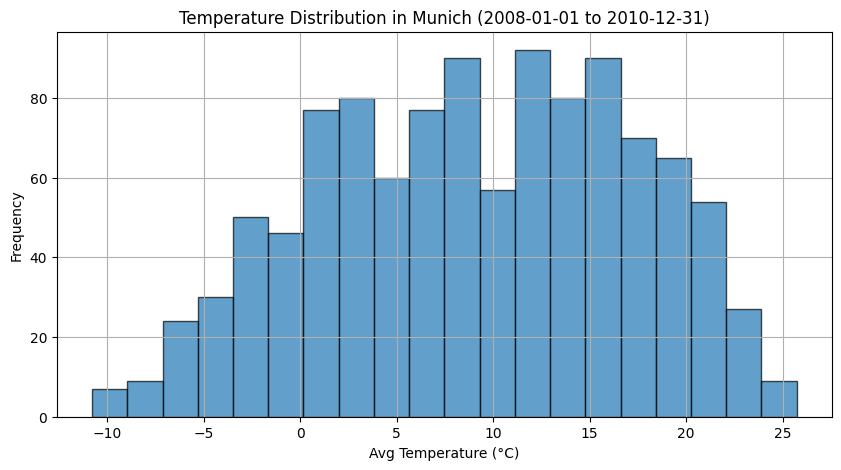

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Create the histogram
plt.figure(figsize=(10, 5))
plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.7, edgecolor="black")

# Step 2: Add plot labels and title
plt.title(f"Temperature Distribution in {city} ({start_date.date()} to {end_date.date()})")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Frequency")

# Step 3: Display the plot
plt.grid(True)
plt.show()

In [ ]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.plot()                # TODO plot each city line and use the label parameter to set the legend name for each city

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()

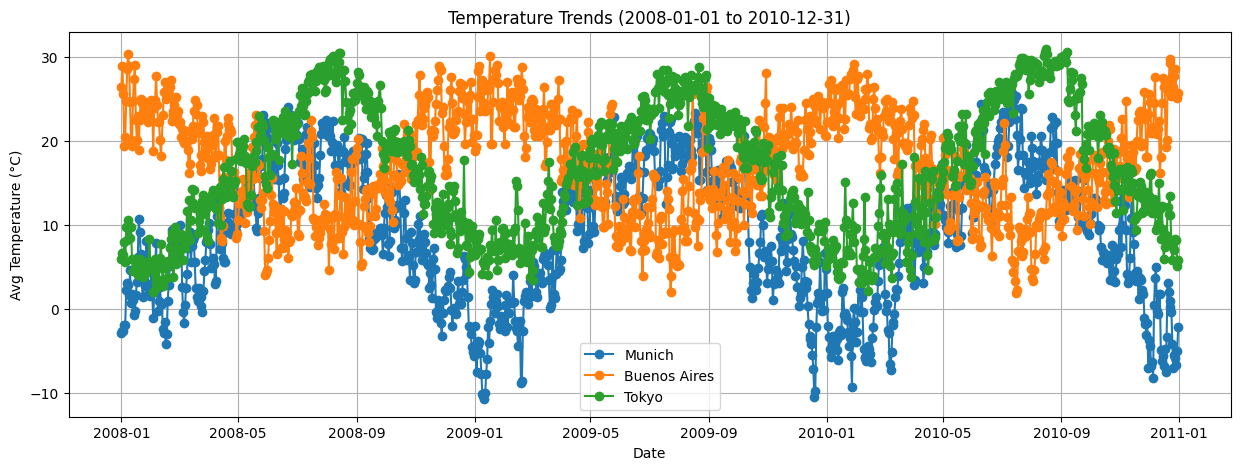

In [ ]:
import matplotlib.pyplot as plt

# Define the list of selected cities
selected_cities = ["Munich", "Buenos Aires", "Tokyo"]

# Convert start_date and end_date to datetime format
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2010-12-31")

# Set figure size
plt.figure(figsize=(15, 5))

# Loop through each selected city and plot temperature trends
for city in selected_cities:
    # Filter data for the selected city
    city_df = df_temp[df_temp["City"] == city]

    # Further filter data for the selected time period
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
    
    # Plot temperature trends
    plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], marker="o", linestyle="-", label=city)

# Add labels, title, and legend
plt.title(f"Temperature Trends ({start_date.date()} to {end_date.date()})")
plt.xlabel("Date")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

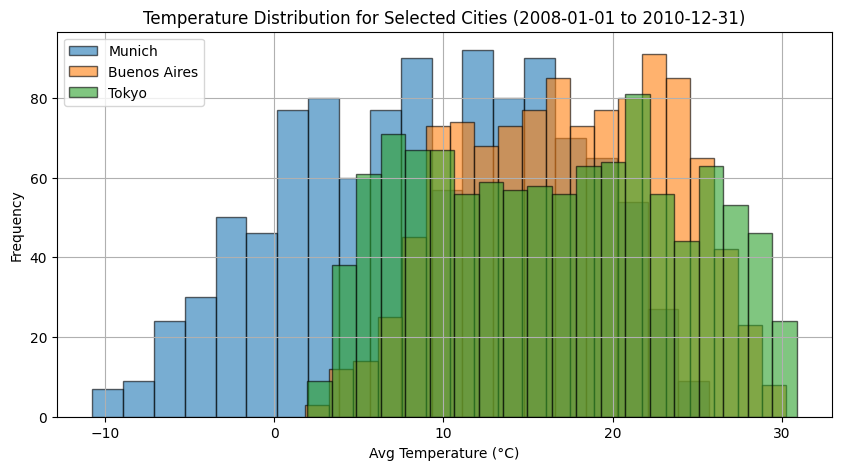

In [ ]:
# Set figure size
plt.figure(figsize=(10, 5))

# Loop through each city and plot histogram
for city in selected_cities:
    # Filter data for the selected city
    city_df = df_temp[df_temp["City"] == city]
    
    # Further filter data for the selected time period
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
    
    # Plot histogram with transparency for better visualization
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.6, edgecolor="black", label=city)

# Add labels, title, and legend
plt.title(f"Temperature Distribution for Selected Cities ({start_date.date()} to {end_date.date()})")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/k8/3ssq2lqx2x7dnd_7z5cjh3vh0000gn/T/ipykernel_24893/4281969636.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


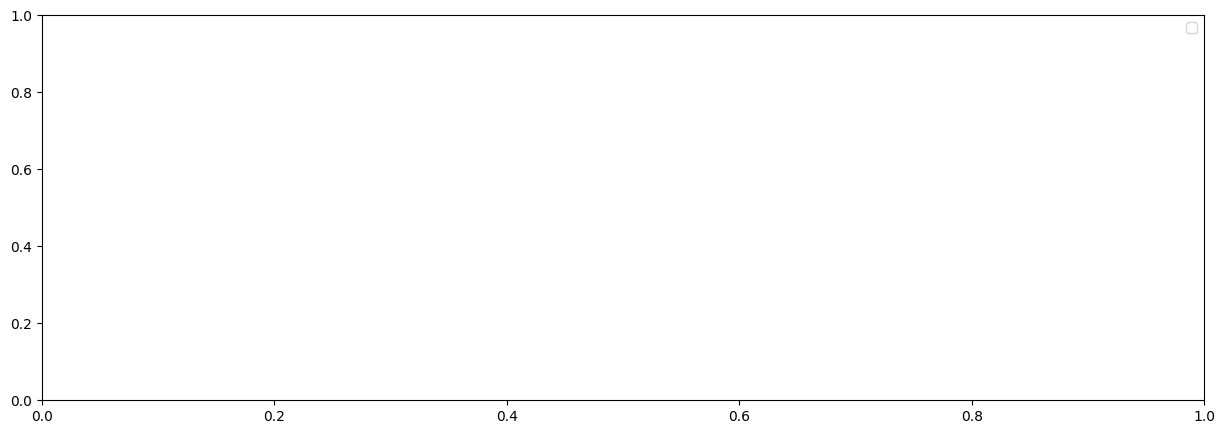

In [ ]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.hist()                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()


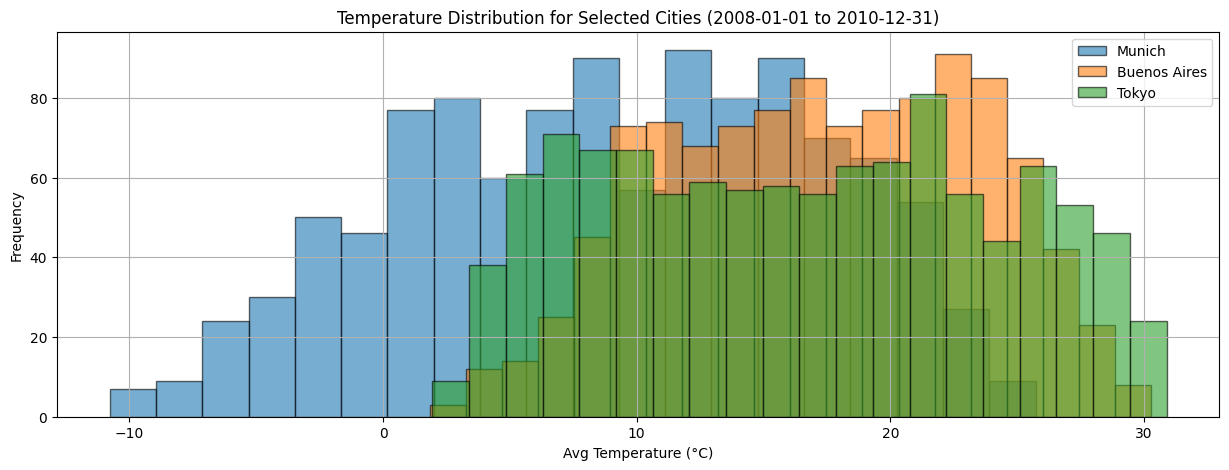

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 5))

# Loop through each city and plot histogram
for city in selected_cities:
    # Filter data for the selected city
    city_df = df_temp[df_temp["City"] == city]
    
    # Further filter data for the selected time period
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
    
    # Plot histogram for each city
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.6, edgecolor="black", label=city)

# Add labels, title, and legend
plt.title(f"Temperature Distribution for Selected Cities ({start_date.date()} to {end_date.date()})")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()